In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def compute_distribution(x):
    s = np.linalg.svd(x,compute_uv=False)
    ans = s/np.sum(s)
    return ans

def relative_entropy(p,q):
    if not(p.shape == q.shape):
        print("\n Error: dimension must be aligned for two vectors\n")
        quit()
    p_over_q = np.zeros(len(p))
    with np.errstate(divide='ignore'):
        p_over_q = p/q
    t = np.log2(p_over_q)
    t[np.isnan(t)] = 0.0
    t[np.isinf(t)] = 0.0
    ans = np.inner(p,t)
    return ans

In [3]:
import os

path = '../Quiz 3/datas/'
files = os.listdir(path)
files.sort()
filename_list = list(filter(lambda x:x[-4:] =='.csv', files))

dataname_list = []

for e in filename_list:
    idx = e.find('_n.csv')
    e = e[0:idx]
    dataname_list.append(e)

p_distribution = {}
i = 0
for filenames in filename_list:
    df = pd.read_csv(path + filenames)
    df1 = df.iloc[:,2:df.shape[1]]
    p_distribution[dataname_list[i]] = compute_distribution(df1)
    i += 1

In [4]:
hft_relative_matrix = np.zeros([len(p_distribution),len(p_distribution)])

for i in range(len(dataname_list)):
    for j in range(len(dataname_list)):
        hft_relative_matrix[i,j] = relative_entropy(p_distribution[dataname_list[i]], p_distribution[dataname_list[j]])

relative_entropy_df = pd.DataFrame(data=hft_relative_matrix, index= dataname_list, columns= dataname_list)

print("\n Checking relative entropy:\n")
print(relative_entropy_df)


 Checking relative entropy:

          AAPL       AEO      AMZN       BAC      CPRI         C       GES  \
AAPL  0.000000  0.002156  0.000030  0.000381  0.001259  0.000155  0.002982   
AEO   0.005817  0.000000  0.005026  0.001720  0.000229  0.002660  0.000361   
AMZN  0.000028  0.002058  0.000000  0.000300  0.001177  0.000123  0.002912   
BAC   0.000732  0.001061  0.000490  0.000000  0.000416  0.000116  0.001843   
CPRI  0.003002  0.000197  0.002536  0.000604  0.000000  0.001102  0.000718   
C     0.000240  0.001450  0.000184  0.000104  0.000689  0.000000  0.002216   
GES   0.008430  0.000620  0.008337  0.004213  0.001146  0.004844  0.000000   
GOOG  0.000294  0.001477  0.000152  0.000063  0.000713  0.000035  0.002300   
GS    0.000182  0.001544  0.000190  0.000158  0.000761  0.000016  0.002279   
HD    0.000165  0.001638  0.000241  0.000244  0.000841  0.000055  0.002334   
HSBC  0.000303  0.001504  0.000428  0.000325  0.000752  0.000099  0.002122   
ITEL  0.000949  0.000893  0.000685

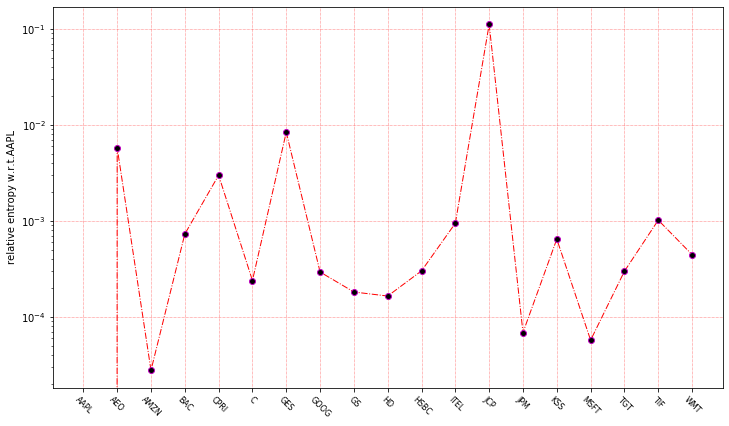

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(111)
plt.plot(relative_entropy_df['AAPL'],'r-.', markeredgecolor = 'm', markerfacecolor = 'k', marker = 'o', linewidth = 1.0)
plt.yscale('log')
plt.ylabel('relative entropy w.r.t.' + 'AAPL')
plt.grid('True', color = 'r', linewidth = 0.5, linestyle = ':')

# make tick label rotated to save space
for ticklabel in ax.get_xticklabels():
    ticklabel.set_rotation(315)
    plt.setp(plt.gca().get_xticklabels(),fontsize=8)

plt.show()